# Me recomende uma música!

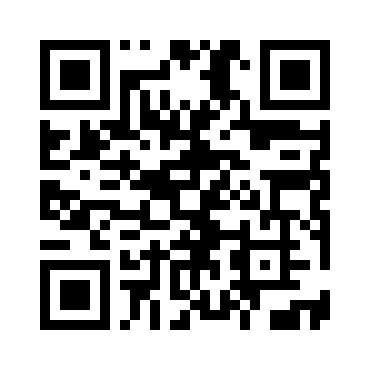

In [1]:
# nao precisa fazer essa parte kkkk
import qrcode

link = qrcode.make('https://forms.gle/kbeeCJCd1pGBLzs88')
type(link)  # qrcode.image.pil.PilImage
link

# Colorindo Imagens Astronômicas - SIFSC 12

In [4]:
#importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [5]:
def show_img(img_list, nrow, ncol):

    fig = plt.figure(figsize=(5*(ncol+1), 5*(nrow+1))) 

    gs = gridspec.GridSpec(nrow, ncol,
             wspace=0.05, hspace=0.0, 
             top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
             left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
    idx = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

    for i in range(ncol*nrow):
        ax = plt.subplot(gs[idx[i]])
        ax.imshow(img_list[i], "gray")
        ax.set_xticks([])
        ax.set_yticks([])

## Abrindo as imagens da NGC3324

In [6]:
imgs = []
for img in sorted(os.listdir('./ngc3324/')):
    if os.path.splitext(img)[1] == '.png':
        print(img)
        imgs.append(plt.imread('./ngc3324/'+img))

jw02731-o001_t017_nircam_clear-f090w_i2d.png
jw02731-o001_t017_nircam_clear-f187n_i2d.png
jw02731-o001_t017_nircam_clear-f200w_i2d.png
jw02731-o001_t017_nircam_clear-f335m_i2d.png
jw02731-o001_t017_nircam_clear-f444w_i2d.png
jw02731-o001_t017_nircam_f444w-f470n_i2d.png


## Normalização dos histogramas

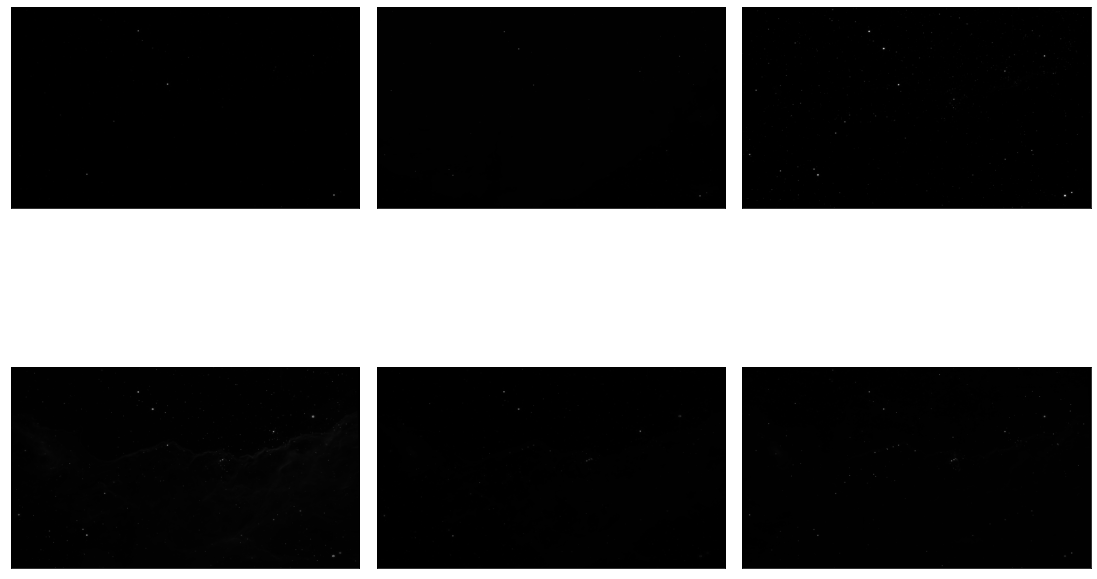

In [7]:
show_img(imgs, 2, 3)

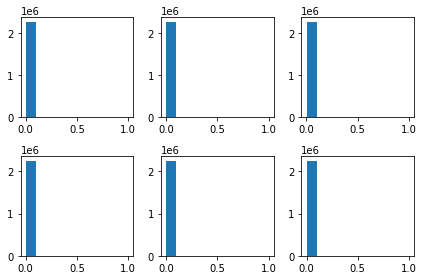

In [8]:
fig, axs = plt.subplots(2,3)

idx = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
for i in range(6):
    axs[idx[i]].hist(imgs[i].flatten())
plt.tight_layout()

In [9]:
def hist_eq(img, nbins=2**16):

    img_hist, bins = np.histogram(img.flatten(), nbins, density=True)
    cdf = img_hist.cumsum()
    cdf = (nbins-1) * cdf / cdf[-1]

    img_eq = np.interp(img.flatten(), bins[:-1], cdf)

    return img_eq.reshape(img.shape)

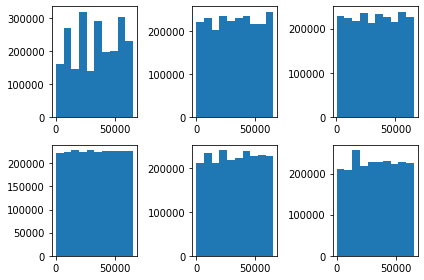

In [10]:
imgs = [np.array(hist_eq(i)) for i in imgs]

fig, axs = plt.subplots(2,3)

idx = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
for i in range(6):
    axs[idx[i]].hist(imgs[i].flatten())
plt.tight_layout()

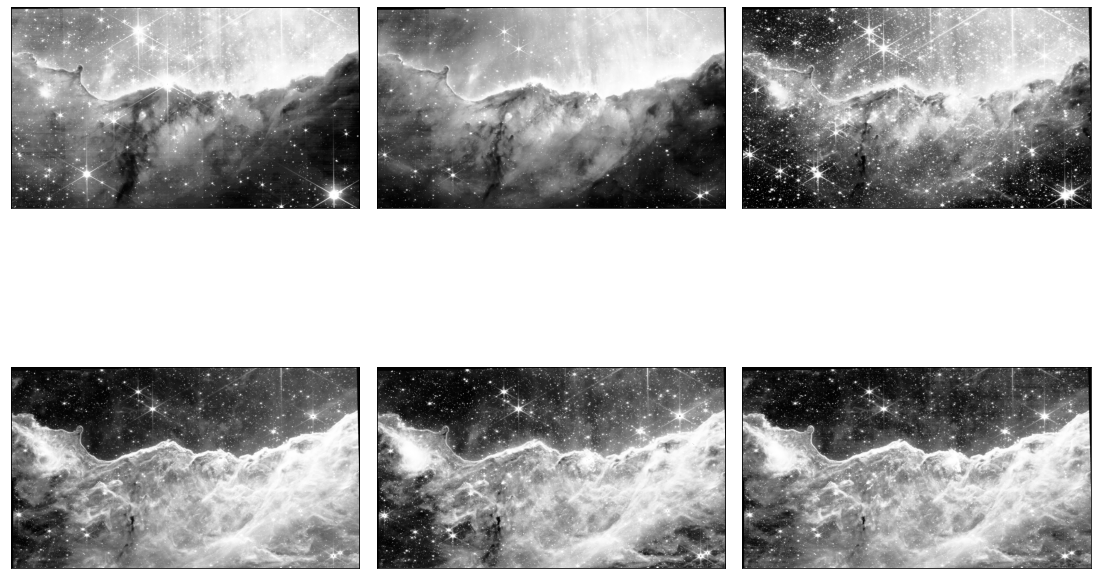

In [11]:
show_img(imgs, 2, 3)

# Combinando duas imagens

In [13]:
red = np.dstack([imgs[4],imgs[5]])
red = red.mean(axis=2)
red = (red - red.min())/(red.max() - red.min())

green = np.dstack([imgs[2],imgs[3]])
green = green.mean(axis=2)
green = (green - green.min())/(green.max() - green.min())

blue = np.dstack([imgs[0],imgs[1]])
blue = blue.mean(axis=2)
blue = (blue - blue.min())/(blue.max() - blue.min())

channels = [red, green, blue]

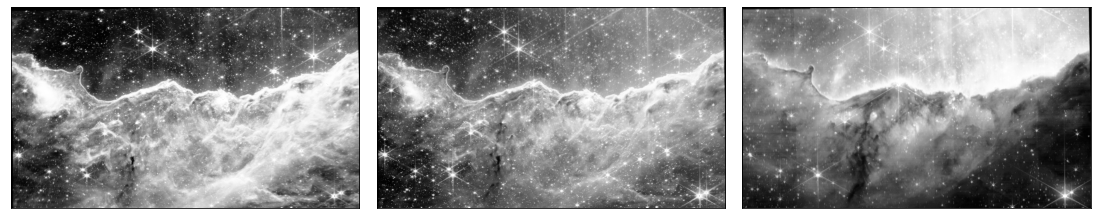

In [14]:
show_img(channels, 1, 3)

# Algoritmo de Lupton

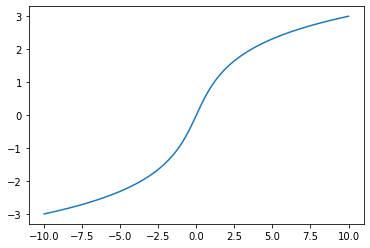

In [15]:
x = np.linspace(-10,10,1000)
plt.plot(x, np.arcsinh(x))

### Escala de cinza para RGB 

$$
f(x) = \frac{\arcsin(x-m)}{\beta\arcsin(M-m)}
$$

In [19]:
def asinh(img_src, non_linear=2.0):

    img = np.array(img_src, copy=True)
    
    scale_min = img.min()
    scale_max = img.max()
    
    factor = np.arcsinh((scale_max - scale_min)/non_linear)
    img = np.arcsinh((img - scale_min)/non_linear)/factor

    return img

## Colorindo a Imagem!

[]

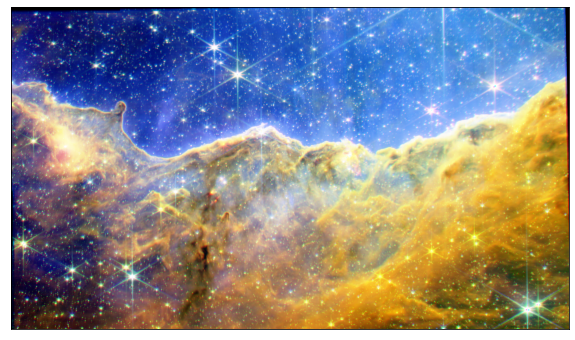

In [20]:
new_channels = [asinh(channels[0], non_linear = 2.),
                asinh(channels[1], non_linear = 2.), 
                asinh(channels[2], non_linear = 2.)]

color_img = np.dstack(new_channels)

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(color_img, "gray")
ax.set_xticks([])
ax.set_yticks([])